In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

#print('Python: {}'.format(sys.version))
#print('Numpy: {}'.format(numpy.__version__))
#print('Pandas: {}'.format(pandas.__version__))
#print('Matplotlib: {}'.format(matplotlib.__version__))
#print('Seaborn: {}'.format(seaborn.__version__))
#print('Scipy: {}'.format(scipy.__version__))
#print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.22.0
Matplotlib: 2.1.2
Seaborn: 0.8.1
Scipy: 1.0.0
Sklearn: 0.19.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('D:/creditcard.csv')

In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [7]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [10]:
data = data.sample(frac = 0.1, random_state = 1)

print(data.shape)

(285, 31)


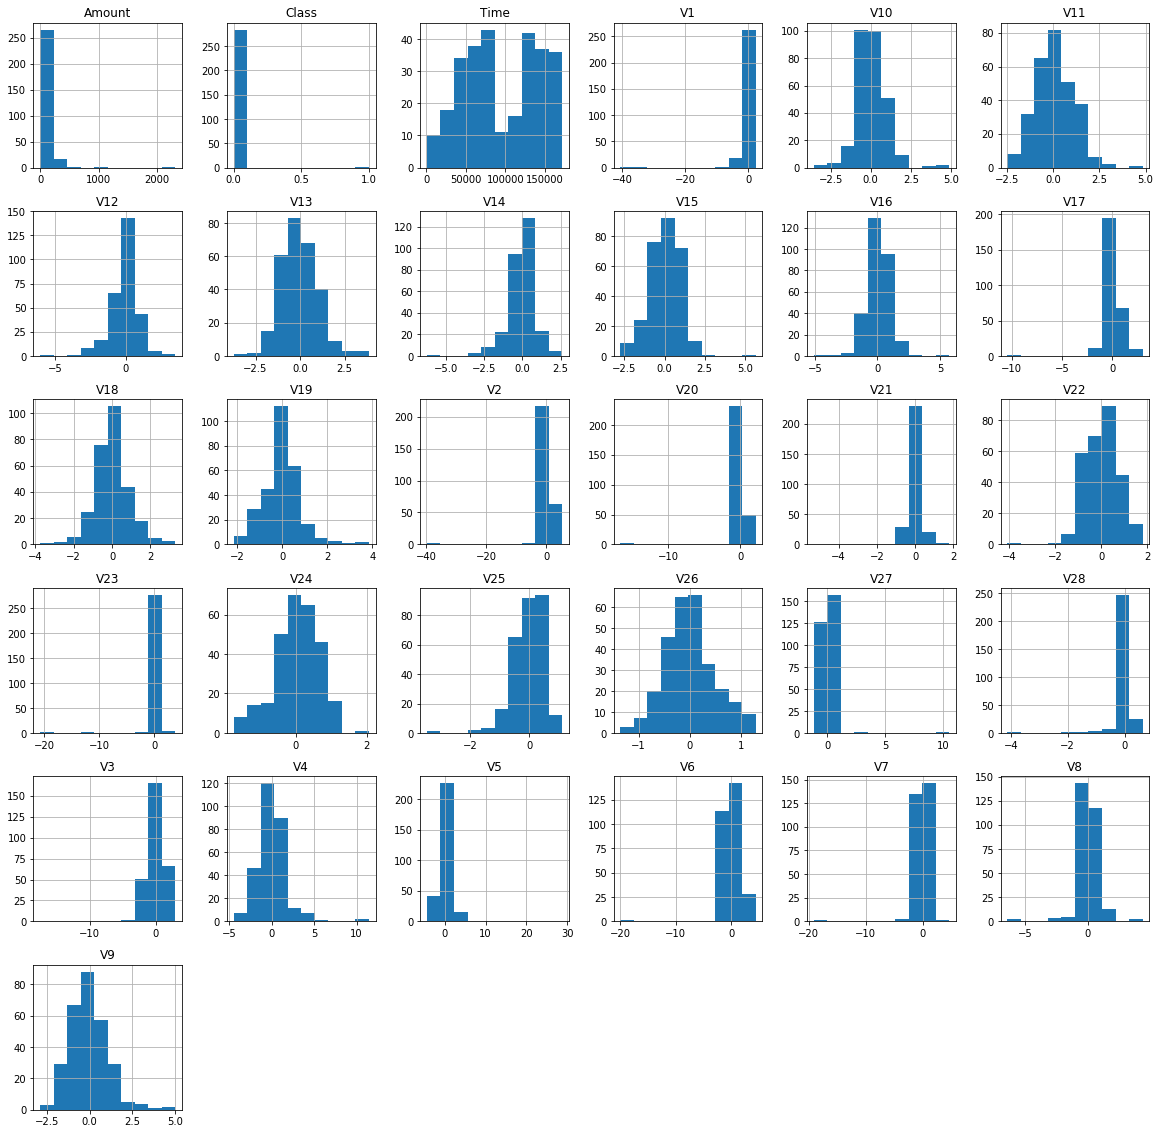

In [11]:
data.hist(figsize = (20,20))
plt.show()

In [13]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0035211267605633804
Fraud Cases: 1
Valid Cases: 284


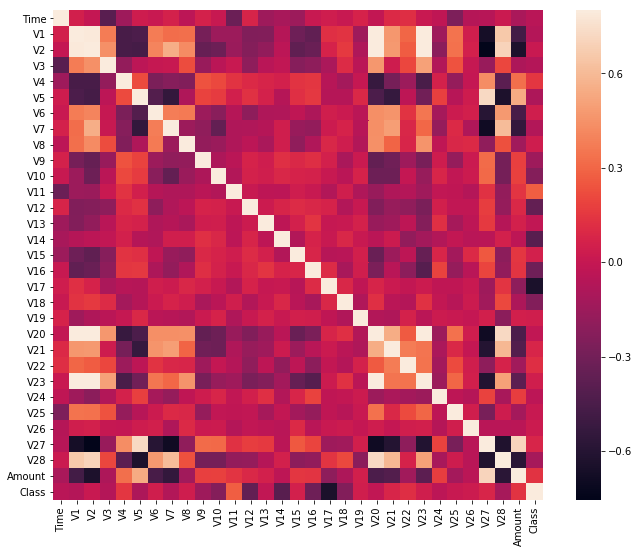

In [23]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [24]:
# Get all the columns from Dataframe

columns = data.columns.tolist()

#Filter the columns to remove data we do not want

columns = [c for c in columns if c not in ['Class']]

#Store the variable we'll be predicting on

target = 'Class'

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(285, 30)
(285,)


In [25]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state

state = 1

#define the outlier detection methods

classifiers ={
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
    
}

In [26]:
# Fit the model

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outiers:
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the prediction values to 0 for valid 1 for fraud
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics 
    
    print(' {}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

 Isolation Forest: 3
0.9894736842105263
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       284
          1       0.00      0.00      0.00         1

avg / total       0.99      0.99      0.99       285

 Local Outlier Factor: 3
0.9894736842105263
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       284
          1       0.00      0.00      0.00         1

avg / total       0.99      0.99      0.99       285



In total 285 users 1 makes fraud and all other are valid with model prediction.
Precision and recall are ratio 0.99 which states the the accuracy of model is higher.